In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import sys
sys.path.append("..")
import bopt

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

tf.enable_eager_execution()

import tensorflow_probability as tfp

tfd = tfp.distributions
psd_kernels = tfp.positive_semidefinite_kernels

In [3]:
kernel = psd_kernels.ExponentiatedQuadratic()
index_points = np.linspace(-1, 1, 100).reshape(-1, 1)

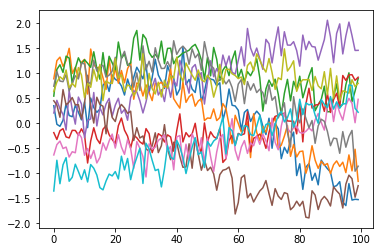

In [4]:
gp = tfd.GaussianProcess(kernel, index_points)
samples = gp.sample(10)

noisy_gp = tfd.GaussianProcess(kernel, index_points, observation_noise_variance=0.05)
noisy_samples = noisy_gp.sample(10)

plt.plot(noisy_samples.numpy().T)
plt.show()

In [5]:
from plotly import __version__
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

/home/darth/projects/master-thesis-code/.venv/lib/python3.6/site-packages/ipywidgets/widgets/widget.py:281: DeprecationWarning:

Widget registration using a string name has been deprecated. Widget registration now uses a plain `@register` decorator.



In [6]:
kernel = psd_kernels.ExponentiatedQuadratic(length_scale=tf.constant(0.3, dtype=tf.float64),
                                            amplitude=tf.constant(0.3, dtype=tf.float64))
gp = tfd.GaussianProcess(kernel, X[:])
nll = -gp.log_prob(Y[:]).numpy()

print(nll)

NameError: name 'X' is not defined

In [7]:
def gp_nll(X, Y, l, s):
    X = tf.convert_to_tensor(X, dtype=tf.float64)
    Y = tf.convert_to_tensor(Y, dtype=tf.float64)
    
    if X.ndim == 1:
        X = tf.expand_dims(X, -1)
    
#     import pdb; pdb.set_trace()
    
    l = tf.constant(l, dtype=tf.float64)
    s = tf.constant(s, dtype=tf.float64)
    
    kernel = psd_kernels.ExponentiatedQuadratic(length_scale=l, amplitude=s)
    gp = tfd.GaussianProcess(kernel, X, observation_noise_variance=tf.Variable(0.48, dtype=tf.float64))
    neg_log_likelihood = -gp.log_prob(Y)
    
    #assert neg_log_likelihood >= 0, f"got logprob < 0 ... {neg_log_likelihood} for l={l}"
    
    return neg_log_likelihood

In [8]:
from functools import partial


def plot_kernel_nll(X, Y):    
    res = 20

    L = np.linspace(1.1, 3.5, num=res, dtype=np.float64)
    S = np.linspace(2.1, 5., num=res, dtype=np.float64)
    
    l, s = np.meshgrid(L, S)
    rows = np.array(np.vectorize(partial(gp_nll, X, Y))(l, s))
    plt.pcolor(L, S, rows, cmap="jet")
    plt.colorbar()
    plt.show()

In [9]:
X = np.sort(np.random.uniform(0., 1., [50, 1]).astype(np.float64), axis=0)
Y = np.array(list(map(lambda x: np.sin(x[0]), X))).astype(np.float64)        

Instructions for updating:
Colocations handled automatically by placer.


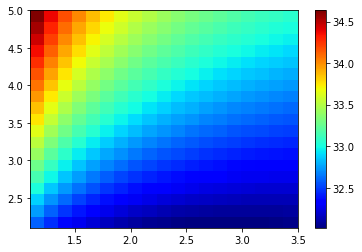

In [10]:
plot_kernel_nll(X, Y)

In [11]:
bopt.GaussianProcess().fit(X.reshape(-1), Y).optimize_kernel().posterior(np.linspace(0., 1.)).plot_posterior()

InvalidArgumentError: Input matrix and rhs are incompatible. [Op:MatrixSolve]

In [15]:
np.array([1,2,3]).reshape(-1, 1).shape

(3, 1)

In [ ]:
(3, 4) * (4, 1) = (3, 1)
(3, 4) * (4,) = (3, 1)


(m, k) * (k, n) = (m, n)

In [246]:
gp_nll(np.expand_dims(X_train, -1), y_train, 0.1, 0.1)

<tf.Tensor: id=1292695, shape=(), dtype=float64, numpy=40.218739768666126>

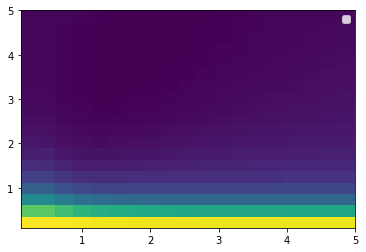

In [247]:
plot_kernel_nll(np.expand_dims(X_train, -1), y_train)

In [202]:
gp_nll(X, Y, 1, 1).numpy()

-270.65699750862854

In [200]:
bopt.GaussianProcess(kernel=bopt.SquaredExp(1, 1)).fit(X.reshape(-1), Y).log_prob(X.reshape(-1), Y)

-80.85786787185779

In [189]:
# Ugly data

In [12]:
noise = 1

params = [0.1, 0.3]#, 0.6, 0.9]

#X_train = np.array([0, 0.02, 0.05, 0.3, 0.4,1,1.1,1.2,1.3,1.4,2,3,4])

X_train = np.array([2,2.01,3])#, 0.02, 0.05, 0.3, 0.4,1,2,3,4])
y_train = np.array([2,3,5])

# X_train = np.array([2,2.01,2.02,3])#, 0.02, 0.05, 0.3, 0.4,1,2,3,4])
# y_train = np.array([2,3,2,100])


# y_train[1] = .6
# y_train[2] = 1

X = np.arange(min(X_train) - 0.1, max(X_train) + 0.1, step=0.01)

In [36]:
%debug

> /home/darth/projects/master-thesis-code/.venv/lib/python3.6/site-packages/tensorflow/python/framework/constant_op.py(110)convert_to_eager_tensor()
    108       return ops.EagerTensor(
    109           value, handle, device, dtype, tensor)
--> 110     t = ops.EagerTensor(value, handle, device, dtype)
    111     scalar_cache[cache_key] = t
    112     return t

ipdb> exit


6.62661865445007


InternalError: Could not find valid device for node.
Node: {{node MatrixSolve}}
All kernels registered for op MatrixSolve :
  device='CPU'; T in [DT_COMPLEX128]
  device='CPU'; T in [DT_COMPLEX64]
  device='CPU'; T in [DT_DOUBLE]
  device='CPU'; T in [DT_FLOAT]
 [Op:MatrixSolve]

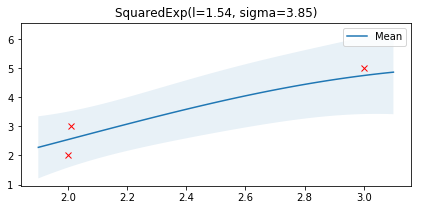

In [37]:
bopt.GaussianProcess(noise=0.48, kernel=bopt.SquaredExp(1.54, 3.85)).fit(X_train, y_train)\
    .posterior(X).plot_posterior(num_samples=0).log_prob()

bopt.GaussianProcess().fit(X_train, y_train)\
    .optimize_kernel().posterior(X).plot_posterior(num_samples=0).log_prob()

6.626818110477907


6.626818110477907

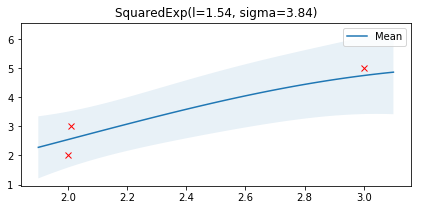

In [26]:
bopt.GaussianProcess(noise=0.48, kernel=bopt.SquaredExp(1.54, 3.84)).fit(X_train, y_train)\
    .posterior(X).plot_posterior(num_samples=0).log_prob()

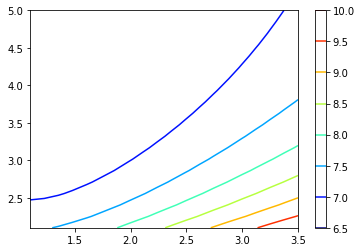

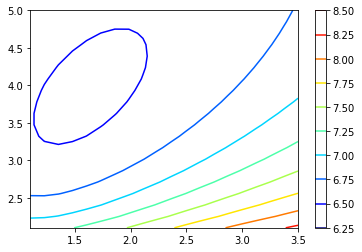

In [306]:
from functools import partial


def plot_kernel_nll(X, Y):    
    res = 20

    L = np.linspace(1.1, 3.5, num=res, dtype=np.float64)
    S = np.linspace(2.1, 5., num=res, dtype=np.float64)
    
    l, s = np.meshgrid(L, S)
    
    def nll_gp(x, y):
        return bopt.GaussianProcess(noise=0.48, kernel=bopt.SquaredExp(x, y)).fit(X_train, y_train)\
            .posterior(X).log_prob()
    
    rows = np.array(np.vectorize(partial(nll_gp))(l, s))
    plt.contour(L, S, rows, cmap="jet")
    plt.colorbar()
    plt.show()

    
plot_kernel_nll(X_train, y_train)

from functools import partial


def plot_kernel_nll(X, Y):    
    res = 20

    L = np.linspace(1.1, 3.5, num=res, dtype=np.float64)
    S = np.linspace(2.1, 5., num=res, dtype=np.float64)
    
    l, s = np.meshgrid(L, S)
    rows = np.array(np.vectorize(partial(gp_nll, X, Y))(l, s))
#     plt.pcolor(L, S, rows, cmap="jet")
    plt.contour(L, S, rows, cmap="jet")
    plt.colorbar()
    plt.show()
    

plot_kernel_nll(X_train, y_train)

Step 0: NLL = 47.58521210322328, ls = 1.0, amp = 1.0, obsnoise = 0.006737946999085467
Step 100: NLL = 8.107891685193204, ls = 1.2904813296942597, amp = 3.588332925539896, obsnoise = 0.07733757677354744
Step 200: NLL = 6.722094153049945, ls = 1.4810553723732585, amp = 3.875782377097542, obsnoise = 0.19672708591532662
Step 300: NLL = 6.4958037412706675, ls = 1.5226335005371312, amp = 3.872039432236173, obsnoise = 0.3281195493107196
Step 400: NLL = 6.458684435685816, ls = 1.5462025482712682, amp = 3.855249399625497, obsnoise = 0.42811418478029445
Step 500: NLL = 6.455163262665023, ls = 1.5565054221630445, amp = 3.846683830603256, obsnoise = 0.47349039834359535
Step 600: NLL = 6.455064564028334, ls = 1.5585924496309245, amp = 3.8448950526355605, obsnoise = 0.48271828436123315
Step 700: NLL = 6.45506428274185, ls = 1.5587107667228441, amp = 3.8447932026375593, obsnoise = 0.48324156263394347
Step 800: NLL = 6.455064937846138, ls = 1.5573931436761654, amp = 3.8453370788482055, obsnoise = 0.48

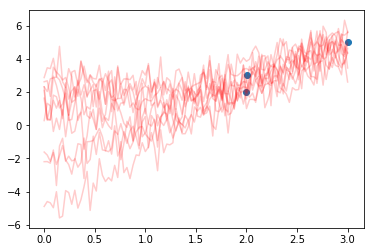

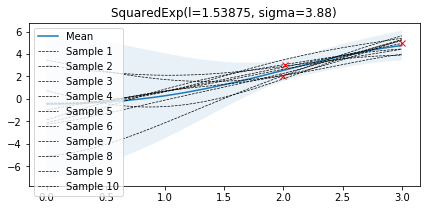

In [252]:
g = tf.Graph()
with g.as_default():

    # Suppose we have some data from a known function. Note the index points in
    # general have shape `[b1, ..., bB, f1, ..., fF]` (here we assume `F == 1`),
    # so we need to explicitly consume the feature dimensions (just the last one
    # here).
    f = lambda x: np.sin(10*x[..., 0]) * np.exp(-x[..., 0]**2)

    # observation_index_points = np.random.uniform(-1., 1., 50)[..., np.newaxis]
    # observations = f(observation_index_points) + np.random.normal(0., .05, 50)
    
    observation_index_points = X_train.reshape(-1, 1).astype(dtype=np.float64)
    observations = y_train.astype(dtype=np.float64) #.reshape(-1, 1)

    # Define a kernel with trainable parameters. Note we transform the trainable
    # variables to apply a positivity constraint.
    amplitude = tf.exp(tf.Variable(np.float64(0)), name='amplitude')
    length_scale = tf.exp(tf.Variable(np.float64(0)), name='length_scale')
    kernel = psd_kernels.ExponentiatedQuadratic(amplitude, length_scale)

    observation_noise_variance = tf.exp(
        tf.Variable(np.float64(-5)), name='observation_noise_variance')

    # We'll use an unconditioned GP to train the kernel parameters.
    gp = tfd.GaussianProcess(
        kernel=kernel,
        index_points=observation_index_points,
        observation_noise_variance=observation_noise_variance)
    neg_log_likelihood = -gp.log_prob(observations)

    optimizer = tf.train.AdamOptimizer(learning_rate=.05, beta1=.5, beta2=.99)
    optimize = optimizer.minimize(neg_log_likelihood)

    # We can construct the posterior at a new set of `index_points` using the same
    # kernel (with the same parameters, which we'll optimize below).
    index_points = np.linspace(0., 3., 100)[..., np.newaxis]
    gprm = tfd.GaussianProcessRegressionModel(
        kernel=kernel,
        index_points=index_points,
        observation_index_points=observation_index_points,
        observations=observations,
        observation_noise_variance=observation_noise_variance)

    samples = gprm.sample(10)
    # ==> 10 independently drawn, joint samples at `index_points`.

    # Now execute the above ops in a Session, first training the model
    # parameters, then drawing and plotting posterior samples.
    with tf.Session(graph=g) as sess:
      sess.run(tf.global_variables_initializer())

      for i in range(1000):
        _, neg_log_likelihood_, ls_, amp_, obsnoise_ = sess.run([optimize, neg_log_likelihood, length_scale, amplitude,
                                                     observation_noise_variance])
        if i % 100 == 0:
          print("Step {}: NLL = {}, ls = {}, amp = {}, obsnoise = {}".format(i, neg_log_likelihood_, ls_, amp_,
                                                                            obsnoise_))

      print("Final NLL = {}".format(neg_log_likelihood_))
      samples_ = sess.run(samples)

      plt.scatter(np.squeeze(observation_index_points), observations)
      plt.plot(np.stack([index_points[:, 0]]*10).T, samples_.T, c='r', alpha=.2)
        
      bopt.GaussianProcess(noise=obsnoise_, kernel=bopt.SquaredExp(l=ls_, sigma=amp_)) \
          .fit(observation_index_points.reshape(-1), observations) \
          .posterior(index_points.reshape(-1)) \
          .plot_posterior(num_samples=10)

In [ ]:




# rows = l + s**2

# plt.pcolor(L, S, rows)
# plt.show()

# plt.imshow(rows)
# plt.show()

# rows = []
# for l in L:
#     row = []
    
#     for s in S:
#         row.append(round(l + s**2, 2))
        
#     rows.append(row)
    
# plt.imshow(rows)
# plt.show()

# plt.pcolor(L, S, rows)

In [64]:
rows

[[0.0, 0.31, 1.23, 2.78, 4.94, 7.72, 11.11, 15.12, 19.75, 25.0],
 [0.56, 0.86, 1.79, 3.33, 5.49, 8.27, 11.67, 15.68, 20.31, 25.56],
 [1.11, 1.42, 2.35, 3.89, 6.05, 8.83, 12.22, 16.23, 20.86, 26.11],
 [1.67, 1.98, 2.9, 4.44, 6.6, 9.38, 12.78, 16.79, 21.42, 26.67],
 [2.22, 2.53, 3.46, 5.0, 7.16, 9.94, 13.33, 17.35, 21.98, 27.22],
 [2.78, 3.09, 4.01, 5.56, 7.72, 10.49, 13.89, 17.9, 22.53, 27.78],
 [3.33, 3.64, 4.57, 6.11, 8.27, 11.05, 14.44, 18.46, 23.09, 28.33],
 [3.89, 4.2, 5.12, 6.67, 8.83, 11.6, 15.0, 19.01, 23.64, 28.89],
 [4.44, 4.75, 5.68, 7.22, 9.38, 12.16, 15.56, 19.57, 24.2, 29.44],
 [5.0, 5.31, 6.23, 7.78, 9.94, 12.72, 16.11, 20.12, 24.75, 30.0]]

In [18]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

11493376/11490434 [==============================] - 1s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2186 - acc: 0.9364
Epoch 2/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0962 - acc: 0.9705
Epoch 3/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0694 - acc: 0.9777
Epoch 4/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0533 - acc: 0.9824
Epoch 5/5
 9472/10000 [===========================>..] - ETA: 0s - loss: 0.0622 - acc: 0.9817

[0.06504089111908107, 0.981]

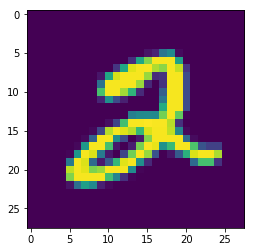

In [33]:
plt.imshow(x_train[5])

In [ ]:
global_step = tf.Variable(0)

w = tf.Variable(...)
x = tf.placeholder(...)

for i in range(1000):
    with tf.GradientTape() as tape:
        y_hat = w*x
        loss = mse(y, y_hat)
        
    global_step += 1
    
    grad = tape.gradient(loss, w)
    
    w -= lr * grad + momentum + ...
    # optimizer.apply(grad, w)

Step 0: NLL = 5024332.975207582
Step 100: NLL = 3864126.523483494
Step 200: NLL = 3061352.5084211207
Step 300: NLL = 2375648.0301485984
Step 400: NLL = 572836.1503184572
Step 500: NLL = 165756.49271280586
Step 600: NLL = 82189.7502202721
Step 700: NLL = 43176.59958718666
Step 800: NLL = 24132.40501042346
Step 900: NLL = 14840.71298407831
1.3720442867086349 0.4318168711500862


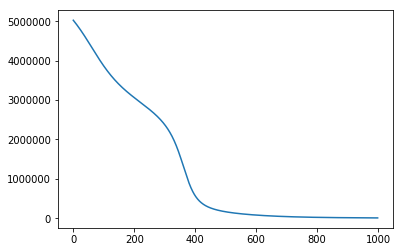

In [12]:
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-2)
optimizer = tf.train.AdamOptimizer()

length_scale = tf.Variable(1., dtype=tf.float64)
amplitude = tf.Variable(1., dtype=tf.float64)
variables = [amplitude, length_scale]


ll = []

for i in range(1000):
    with tf.GradientTape() as t:
        nll = gp_nll(observed_index_points, observed_values, length_scale, amplitude)

    grad = t.gradient(nll, variables)

    optimizer.apply_gradients(zip(grad, variables))

    if i % 100 == 0:
        print("Step {}: NLL = {}".format(i, nll))
    ll.append(nll)
    
plt.plot(ll)
print(amplitude.numpy(), length_scale.numpy())

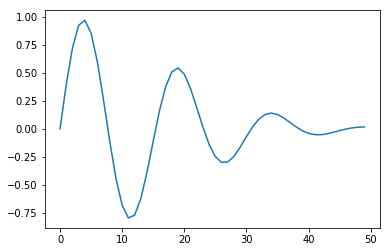

In [15]:
plt.plot(f(np.linspace(0,2).reshape(-1, 1)))

In [ ]:
noise = 1

params = [0.1, 0.3]#, 0.6, 0.9]

#X_train = np.array([0, 0.02, 0.05, 0.3, 0.4,1,1.1,1.2,1.3,1.4,2,3,4])

X_train = np.array([2,2.01,3])#, 0.02, 0.05, 0.3, 0.4,1,2,3,4])
y_train = np.array([2,3,5])

# X_train = np.array([2,2.01,2.02,3])#, 0.02, 0.05, 0.3, 0.4,1,2,3,4])
# y_train = np.array([2,3,2,100])


# y_train[1] = .6
# y_train[2] = 1

X = np.arange(min(X_train) - 0.1, max(X_train) + 0.1, step=0.01)